### 🥩 **Livestock Slaughter: Data Cleaning and Visualization**

- **This notebook loads the dataset `5_Убой скота.xlsx`, performs data cleaning by merging all sheets and removing empty rows, and generates a clean horizontal bar chart to show slaughter volume by category.**  
- All sheets are merged into one dataframe  
- Fully empty and duplicate rows are removed  
- A horizontal bar chart is generated to visualize 2024 slaughter volume across categories, measured in live weight (tons)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
print("📂 Обработка файла: 5_Убой скота.xlsx")

# Загрузка
df = pd.read_excel("data/5_Убой скота.xlsx", sheet_name=None)

# Объединяем все листы
combined_df = pd.concat(df.values(), ignore_index=True)

# Первичная проверка
print("✅ .info():")
print(combined_df.info())

print("\n✅ .head():")
print(combined_df.head())

print("\n✅ .describe():")
print(combined_df.describe(include='all'))

# Проверка пропусков
print("\n🔍 Пропущенные значения:")
print(combined_df.isnull().sum())

# Удаление полностью пустых строк
cleaned_df = combined_df.dropna(how='all')

# Сохраняем очищенный файл
output_path = "data/5_Убой_скота_cleaned.xlsx"
cleaned_df.to_excel(output_path, index=False)
print(f"✅ Готово! Сохранено как: {output_path}")


📂 Обработка файла: 5_Убой скота.xlsx
✅ .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   330 non-null    object
 1   Unnamed: 1   335 non-null    object
 2   Unnamed: 2   340 non-null    object
 3   Unnamed: 3   330 non-null    object
 4   Unnamed: 4   330 non-null    object
 5   Unnamed: 5   330 non-null    object
 6   Unnamed: 6   330 non-null    object
 7   Unnamed: 7   335 non-null    object
 8   Unnamed: 8   330 non-null    object
 9   Unnamed: 9   345 non-null    object
 10  Unnamed: 10  220 non-null    object
dtypes: object(11)
memory usage: 35.1+ KB
None

✅ .head():
                                          Unnamed: 0  \
0  3. Забито в хозяйстве или реализовано на убой ...   
1                                                NaN   
2                                                NaN   
3                              

C:\Users\aruzh\AppData\Local\Temp\ipykernel_19056\2668640296.py:26: UserWarning: Glyph 129385 (\N{CUT OF MEAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aruzh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129385 (\N{CUT OF MEAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


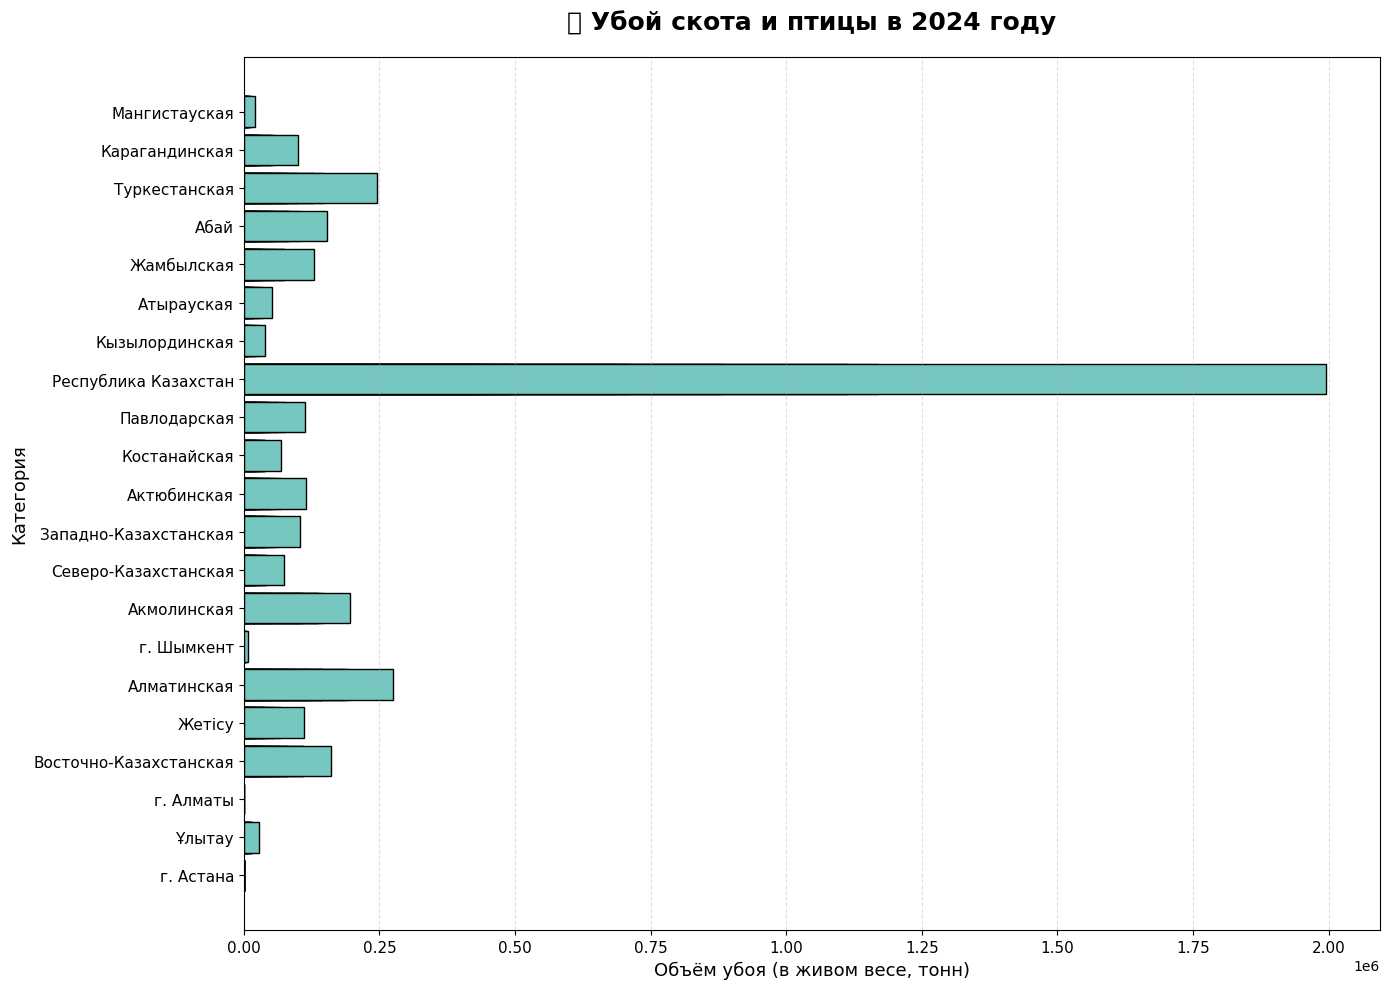

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 📥 Загрузка очищенного файла
df = pd.read_excel("data/5_Убой_скота_cleaned.xlsx")

# 🧹 Очистка
df = df.rename(columns={df.columns[0]: "Категория"})
col = df.columns[1]
df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=[col])
df = df.drop_duplicates()
df = df.sort_values(by=col, ascending=True).reset_index(drop=True)

# 📊 Построение графика
plt.figure(figsize=(14, 10))
plt.barh(df["Категория"], df[col], color="#76C7C0", edgecolor="black")

plt.title("🥩 Убой скота и птицы в 2024 году", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Объём убоя (в живом весе, тонн)", fontsize=13)
plt.ylabel("Категория", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
